# Module 3: Data Analytics with Python - Applied Statistics
# Lab 1: Case Study: Exploratory Data Analytics (EDA)
## Case Stydy: Iris Dataset
### Exploratory Analytics

In [2]:
# Import Data Processing libraries
import numpy as np
import pandas as pd
pd.plotting.register_matplotlib_converters()

# Import Plotting libraries
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style='whitegrid')

# Read data
iris = pd.read_csv("iris.csv")

iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
# Confirm the number of records for each species
iris['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

### Exploratory Data Analysis
General information on the dataset

In [5]:
# Viewing data
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [7]:
# Shape of data
iris.shape

(150, 6)

In [8]:
# Finding null count
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [9]:
# Descriptive analysis
iris.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


Unvariate Analysis

In [10]:
# Distinct Species Values
iris['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [11]:
# Dividing data
setosa = iris.loc[iris['Species'] =="Iris-setosa"]
versicolor = iris.loc[iris['Species'] == "Iris-versicolor"]
virginica = iris.loc[iris['Species'] == "Iris-virginica"]

iris.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

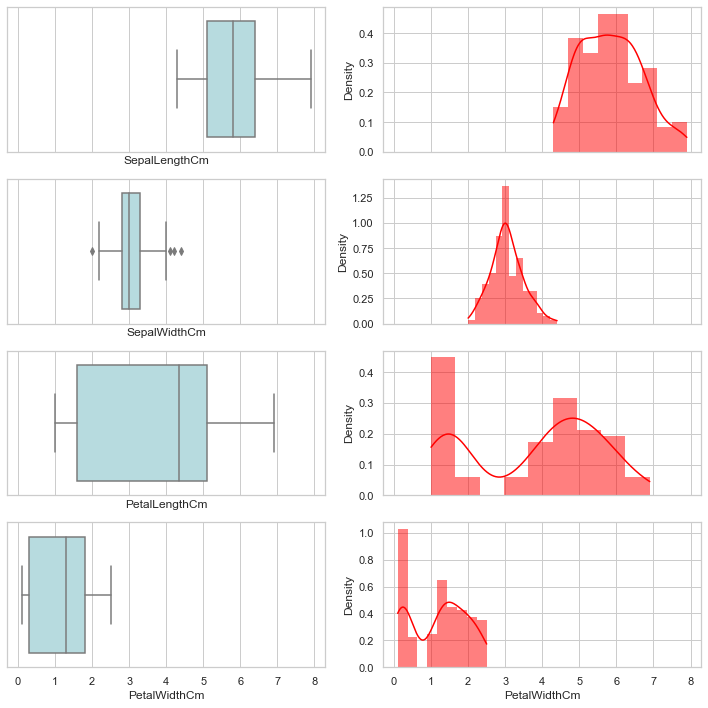

In [14]:
# Setting up subplots
f,axes = plt.subplots(ncols=2,nrows=4,figsize=(10,10), sharex=True)
l = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
for i in range(4):
    
    # Plotting the boxplot
    sns.boxplot(x = iris.loc[:,l[i]],
                ax=axes[i][0],
               color='powderblue')
    
    # Plotting the KDE
    sns.histplot(data = iris.loc[:,l[i]],
                 color = "red",
                 kde = True,
                 stat = "density",
                 linewidth = 0,
                 ax = axes[i][1])
    
    plt.tight_layout()

Bivariate Data Analysis

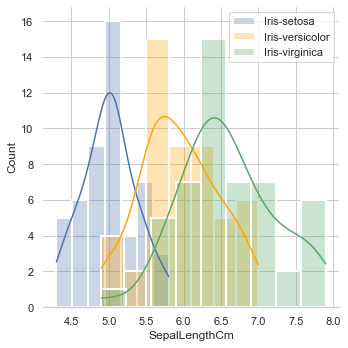

In [19]:
# SepalLengthCm-vs-Species
# Set up the matplotlib figure
f, axes = plt.subplots(ncols=1, figsize=(5,5),sharex=True)
sns.despine(left=True)
        
# Plotting the histograms with KDE
sns.histplot(data=setosa["SepalLengthCm"], label="Iris-setosa", color='b',kde=True,linewidth=2,alpha=0.3)
sns.histplot(data=versicolor["SepalLengthCm"], label="Iris-versicolor", kde=True,color='orange',linewidth=2,alpha=0.3)
sns.histplot(data=virginica["SepalLengthCm"], label="Iris-virginica", kde=True,color='g',linewidth=2,alpha=0.3)

plt.legend()
plt.tight_layout()

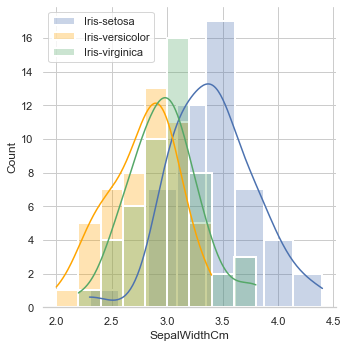

In [20]:
#SepalWidthCm-vs-Species
# Setup the matplotlib figure
f, axes = plt.subplots(ncols=1, figsize=(5,5),sharex=True)
sns.despine(left=True)

sns.histplot(data=setosa["SepalWidthCm"], label="Iris-setosa", color='b',kde=True,linewidth=2,alpha=0.3)
sns.histplot(data=versicolor["SepalWidthCm"], label="Iris-versicolor", kde=True,color='orange',linewidth=2,alpha=0.3)
sns.histplot(data=virginica["SepalWidthCm"], label="Iris-virginica", kde=True,color='g',linewidth=2,alpha=0.3)

plt.legend()
plt.tight_layout()

Multivariate Analysis

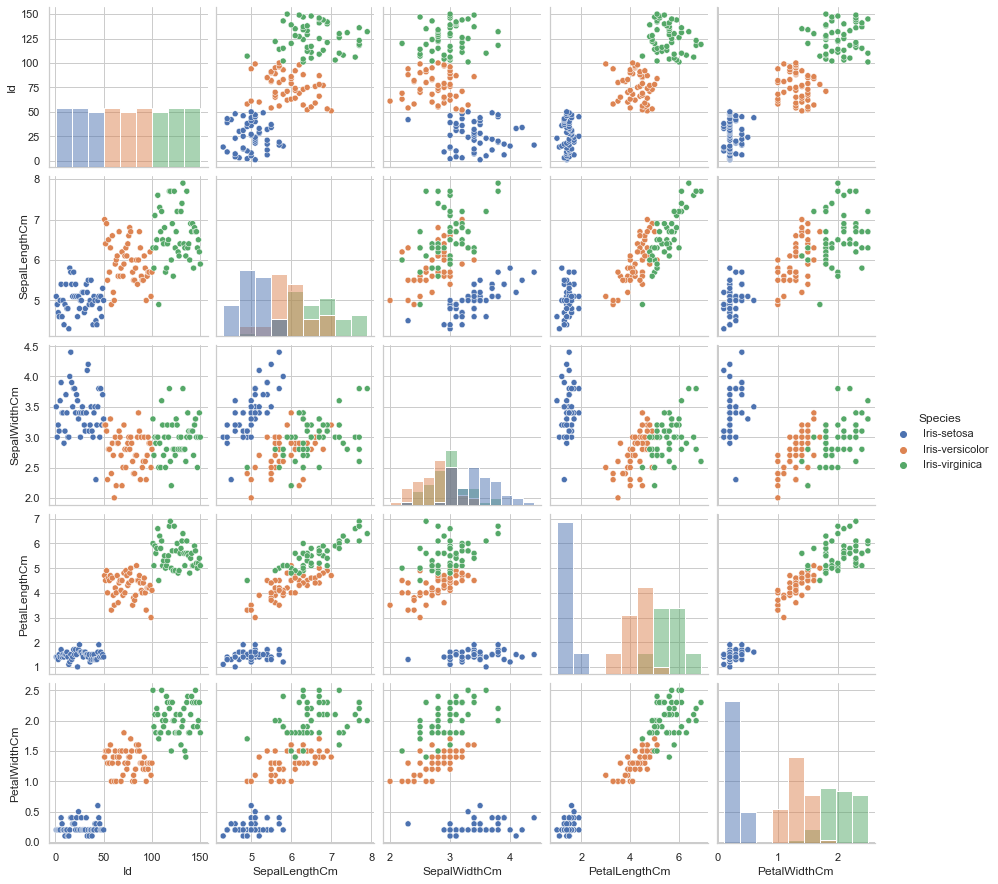

In [21]:
#All species vs All species
sns.pairplot(iris, hue = "Species", diag_kind="hist")
plt.show()

## Sepal Length

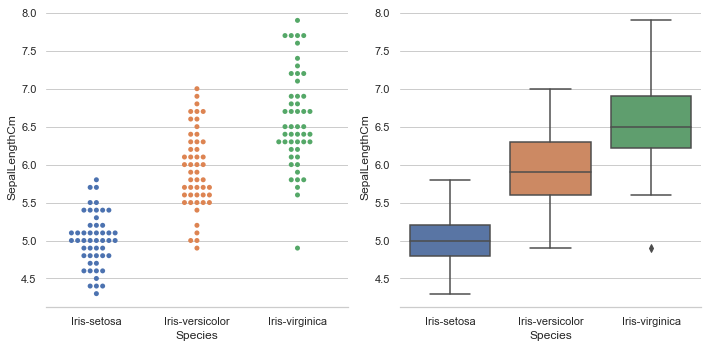

In [22]:
# Plotting Swarm and Box Plots
f, axes = plt.subplots(ncols = 2, figsize=(10, 5), sharex=True)
sns.despine(left=True)

# Plotting the Swarmplots
sns.swarmplot(x=iris['Species'], y=iris['SepalLengthCm'], ax=axes[0])

# Plot the Boxplots
sns.boxplot(x=iris['Species'], y=iris['SepalLengthCm'], ax=axes[1])

plt.tight_layout()

### Conclusion
According to these different plots, the sepal length seems to be quite an interesting feature
to use in order to classify the different species. We can inder that -
1. the sepal length of Iris-setosa flowers is mainly smaller than the sepal length of the two other species.

2. even if the difference of sepal length is less clear between Iris-versicolor and Iris-virginica, the sepal length of Iris-versicolor flowers is mainly smaller than the sepal length of Iris-virginica flowers.

3. There do exist some records of species Iris-Virginica that behave differently from the norm when sepal length is concerned(these are the outliers).

## Sepal Width

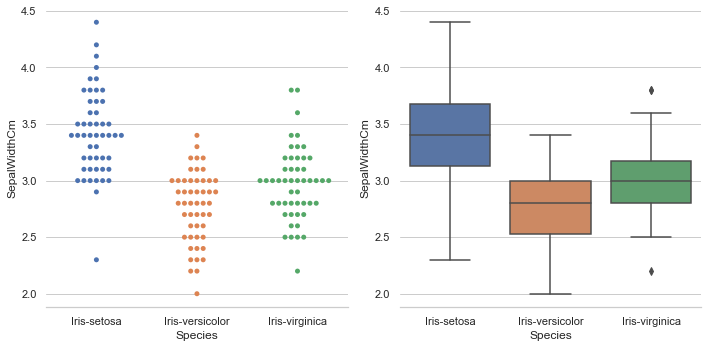

In [24]:
# Plotting Swarm and Box Plots
f, axes = plt.subplots(ncols = 2, figsize=(10, 5), sharex=True)
sns.despine(left=True)

# Plotting the Swarmplots
sns.swarmplot(x=iris['Species'], y=iris['SepalWidthCm'], ax=axes[0])

# Plot the Boxplots
sns.boxplot(x=iris['Species'], y=iris['SepalWidthCm'], ax=axes[1])

plt.tight_layout()

### Conclusion

According to these different plots, the sepal width seems to be the less interesting feature
to use in order to classify the different species. We can infer that:
1. the sepal width of the Iris-setosa flowers seems to be larger than the sepal width of Iris-versicolor and Iris-virginica but for many samples this difference of size is not true
2. the sepal width of the Iris-virginica flowers seems to be larger than the sepal width of Iris-versicolor but for many samples this difference of size is not true
3. There do exist some records of species Iris-Virginica that behave differently from the norm when sepal width is concerned(these are the outliers).

## Petal Length

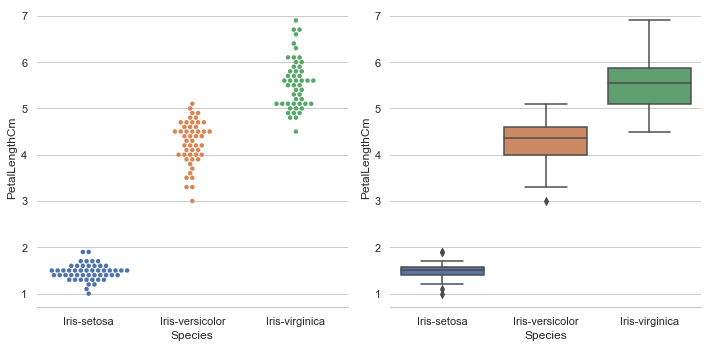

In [26]:
# Plotting Swarm and Box Plots
f, axes = plt.subplots(ncols = 2, figsize=(10, 5), sharex=True)
sns.despine(left=True)

# Plotting the Swarmplots
sns.swarmplot(x=iris['Species'], y=iris['PetalLengthCm'], ax=axes[0], size = 4.5)

# Plot the Boxplots
sns.boxplot(x=iris['Species'], y=iris['PetalLengthCm'], ax=axes[1])

plt.tight_layout()

### Conclusion
According to these different plots, the petal length seems to be an interesting feature to use
in order to classify the different species. We can infer that:
1. the petal length of Iris-setosa flowers is clearly smaller than the petal length of the two other species

2. even if the difference of petal length is less clear between Iris-versicolor and Iris-virginica, the petal length of Iris-versicolor flowers is mainly smaller than the petal length of Iris-virginica flowers
3. There do exist some records of species setosa snd versicolor that behave differently from the norm when petal length is concerned(these are the outliers).

## Petal Width

C:\Users\Naufsl\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 30.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


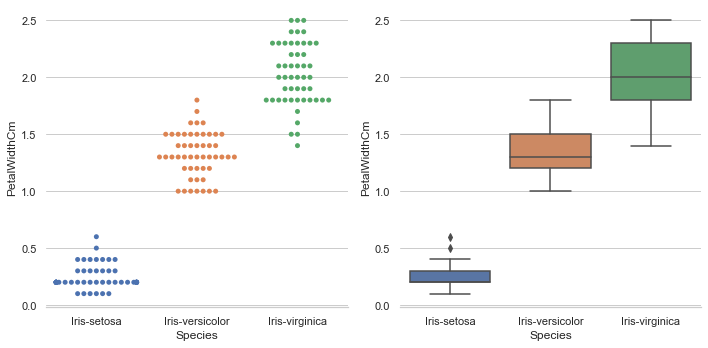

In [29]:
# Plotting Swarm and Box Plots
f, axes = plt.subplots(ncols = 2, figsize=(10, 5), sharex=True)
sns.despine(left=True)

# Plotting the Swarmplots
sns.swarmplot(x=iris['Species'], y=iris['PetalWidthCm'], ax=axes[0])

# Plot the Boxplots
sns.boxplot(x=iris['Species'], y=iris['PetalWidthCm'], ax=axes[1])

plt.tight_layout()

### Conclusion
According to these different plots, the petal width seems to be an interesting feature to use
in order to classify the different species. Indeed :
1. the petal width of Iris-setosa flowers is clearly smaller than the petal width of the two other species

2. even if the difference of petal width is less clear between Iris-versicolor and Iris-virginica, the petal width of Iris-versicolor flowers is mainly smaller than the petal width of Iris-virginica flowers

3. There do exist some records of species setosa that behave differently from the norm when petal width is concerned(these are the outliers).

# Module 4: Section: Linear Regression
# Lab 1: Introduction to Simple and Multivariate Linear Regression

In [30]:
# Necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

from sklearn.linear_model import LinearRegression

In [36]:
import wget

url = 'https://raw.githubusercontent.com/ksnugroho/ai-mastery/main/house_prices.csv'

wget.download(url,'house_prices.csv')

100% [..............................................................................] 17644 / 17644

'house_prices.csv'

In [37]:
data = pd.read_csv('house_prices.csv')
data.head()

,LotArea,SalePrice
0,8450,208500
1,9600,181500
2,11250,223500
3,9550,140000
4,14260,250000


## Plotting our data

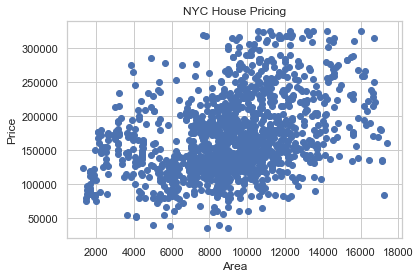

In [38]:
plt.scatter(data['LotArea'], data['SalePrice'])
plt.title('NYC House Pricing')
plt.xlabel('Area')
plt.ylabel('Price')
plt.show()

### Fitting a line on a scatter plot

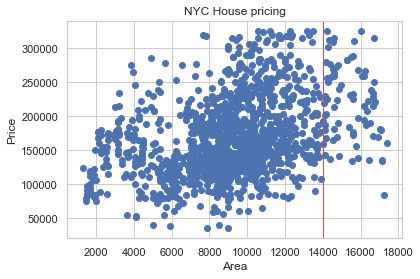

In [39]:
plt.scatter(data['LotArea'], data['SalePrice'])
plt.axvline(x=14000,linewidth='1',color='r')
plt.title('NYC House pricing')
plt.xlabel('Area')
plt.ylabel('Price')
plt.show()

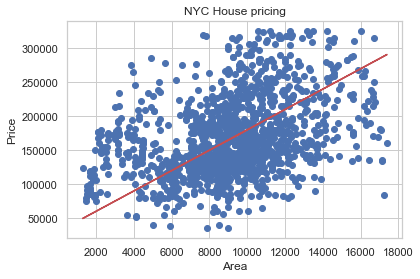

In [41]:
# price = 30000 + 15 area\\ price=10000 + 17 area\\ price= 50000 + 12 area
plt.scatter(data.LotArea, data.SalePrice)
plt.plot(data.LotArea, 30000 + 15*data.LotArea, "r-")
plt.title('NYC House pricing')
plt.xlabel('Area')
plt.ylabel('Price')
plt.show()

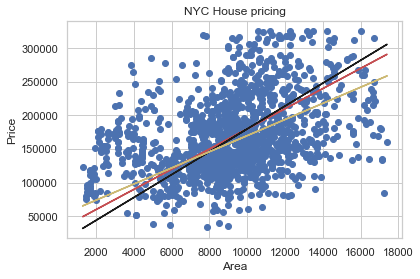

In [44]:
plt.scatter(data.LotArea, data.SalePrice)
plt.plot(data.LotArea, 30000 + 15*data.LotArea, "r-")
plt.plot(data.LotArea, 10000 + 17*data.LotArea, "k-")
plt.plot(data.LotArea, 50000 + 12*data.LotArea, "y-")
plt.title('NYC House pricing')
plt.xlabel('Area')
plt.ylabel('Price')
plt.show()

For example, for house area = 9600, the predictions for red, black and yellow lines are

In [45]:
# red line:
print("red line:", 30000 + 15*9600) # <-- Inserted value 9600 inplace of LotArea

# black line:
print('black line:', 10000 + 17*9600) # <-- Inserted value 9600 inplace of LotArea

# yellow line:
print('yellow line:', 50000 + 12*9600) # <-- Inserted value 9600 inplace of LotArea

red line: 174000
black line: 173200
yellow line: 165200


### Linear Regression in sklearn

In [46]:
x = data.LotArea[:, np.newaxis] # Reshape
y = data.SalePrice

# Fitting Simple Linear Regression to the Training Set
regressor = LinearRegression()
regressor.fit(x,y)

LinearRegression()

# Predictiong the Test Results
y_pred = regressor.predict(x)

Plotting the Best Fitting Line

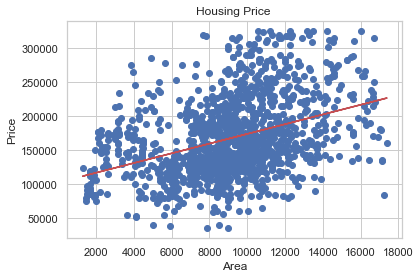

In [49]:
# Train Part
plt.scatter(x, y)
plt.plot(x, y_pred, "r-")
plt.title('Housing Price ')
plt.xlabel('Area')
plt.ylabel('Price')
plt.show()

*Prediction Made Easy*

1. Visually, now we now have a nice approximation of how Area affects the Price
2. We can also make a prediction, the easy way of course!
3. For example: If we want to buy a house of 14,000 sq. ft, we can simply draw a vertical line from 14,000 up to our Approximated Trend line and continue that line towards the y-axis

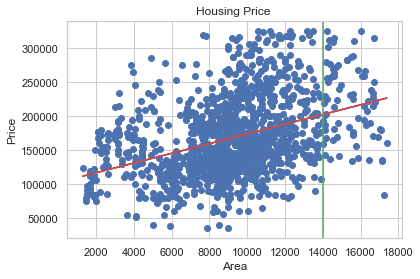

In [51]:
# Train Part
plt.scatter(x, y)
plt.plot(x, y_pred, "r-")
plt.title('Housing Price ')
plt.xlabel('Area')
plt.ylabel('Price')
plt.axvline(x=14000,c='g');

## Multivariate Linear Regression

In [52]:
url = 'https://raw.githubusercontent.com/ksnugroho/ai-mastery/main/dataset/house_prices_multivariate.csv' 

wget.download(url,'house_prices_multivariate.csv')

100% [............................................................................] 158835 / 158835

'house_prices_multivariate.csv'

In [53]:
#Loading the data
NY_Housing = pd.read_csv("house_prices_multivariate.csv")
NY_Housing.head()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,YrSold,SalePrice
0,65.0,8450,7,5,2003,2003,196.0,706,0,150,...,548,0,61,0,0,0,0,0,2008,208500
1,80.0,9600,6,8,1976,1976,0.0,978,0,284,...,460,298,0,0,0,0,0,0,2007,181500
2,68.0,11250,7,5,2001,2002,162.0,486,0,434,...,608,0,42,0,0,0,0,0,2008,223500
3,60.0,9550,7,5,1915,1970,0.0,216,0,540,...,642,0,35,272,0,0,0,0,2006,140000
4,84.0,14260,8,5,2000,2000,350.0,655,0,490,...,836,192,84,0,0,0,0,0,2008,250000


In [56]:
# making Independent and Dependent variables from the dataset
x = NY_Housing.iloc[:,:-1] # Selecting everything except the last column
y = NY_Housing.SalePrice

# Fitting Multiple Linear Regression
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x, y)

LinearRegression()
print("intercept:", regressor.intercept_) # This is the y-intercept
print("coefficients of predictors:", regressor.coef_) # These are the weights or regression coefficients.

intercept: 310649.26008883433
coefficients of predictors: [ 4.21581098e+01  4.41367617e-01  1.77089455e+04  5.84597164e+03
  3.59658315e+02  1.19385237e+02  2.59435150e+01  9.76748897e+00
  7.65860420e-01 -6.61329855e-01  9.87201953e+00  1.96567898e+01
  1.31846867e+01 -4.66155079e+00  2.81799257e+01  6.78157998e+03
  3.36169287e+02  1.40344800e+03 -2.93573021e+03 -8.64074712e+03
 -3.35073713e+04  6.10172168e+03  3.20869122e+03 -8.23684306e+01
  1.56189970e+04  9.59392447e+00  2.51559075e+01  5.60981357e-01
  1.07712460e+01  2.51081902e+01  5.36124522e+01 -4.13099007e+01
 -8.16461371e-02 -5.83097021e+02]


### Predicting the price
Now let's say I want to predict the price of a house with following specifications.

In [57]:
my_house = x.iloc[155]
my_house

LotFrontage          0.0
LotArea          16669.0
OverallQual          8.0
OverallCond          6.0
YearBuilt         1981.0
YearRemodAdd      1981.0
MasVnrArea         653.0
BsmtFinSF1           0.0
BsmtFinSF2           0.0
BsmtUnfSF         1686.0
TotalBsmtSF       1686.0
1stFlrSF          1707.0
2ndFlrSF             0.0
LowQualFinSF         0.0
GrLivArea         1707.0
BsmtFullBath         0.0
BsmtHalfBath         0.0
FullBath             2.0
HalfBath             1.0
BedroomAbvGr         2.0
KitchenAbvGr         1.0
TotRmsAbvGrd         6.0
Fireplaces           1.0
GarageYrBlt       1981.0
GarageCars           2.0
GarageArea         511.0
WoodDeckSF         574.0
OpenPorchSF         64.0
EnclosedPorch        0.0
3SsnPorch            0.0
ScreenPorch          0.0
PoolArea             0.0
MiscVal              0.0
YrSold            2006.0
Name: 155, dtype: float64

In [58]:
pred_my_house = regressor.predict(my_house.values.reshape(1, -1))
print("predicted value:", pred_my_house[0])

predicted value: 264519.4185702705


In [59]:
print("actual value:", y[155])

actual value: 228000


In [60]:
# Predicting the results
y_pred = regressor.predict(x)
y_pred[:10]

array([223165.2446233 , 193708.14702761, 216394.79759077, 197356.62505514,
       295125.75398645, 172516.96207707, 269477.13355181, 245198.81455231,
       168787.92247657,  87185.78920276])

In [61]:
prices = pd.DataFrame({"actual": y,
"predicted": y_pred})
prices.head(10)

,actual,predicted
0,208500,223165.244623
1,181500,193708.147028
2,223500,216394.797591
3,140000,197356.625055
4,250000,295125.753986
5,143000,172516.962077
6,307000,269477.133552
7,200000,245198.814552
8,129900,168787.922477
9,118000,87185.789203


### Measuring the goodness of fit

In [62]:
from sklearn.metrics import r2_score
r2_score(y, y_pred)

0.8046479859403062